In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configuration
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)

print("Imports réussis!")

Imports réussis!


In [2]:
df = pd.read_csv('../data/raw/Walmart_Sales.csv')

print(f"Dataset chargé!")
print(f"Nombre de lignes: {df.shape[0]:,}")
print(f"Nombre de colonnes: {df.shape[1]}")
print(df['Date'].head())
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
print(df['Date'].dtype)
print(f"\nPériode: {df['Date'].min()} à {df['Date'].max()}")

Dataset chargé!
Nombre de lignes: 6,435
Nombre de colonnes: 8
0    05-02-2010
1    12-02-2010
2    19-02-2010
3    26-02-2010
4    05-03-2010
Name: Date, dtype: object
datetime64[ns]

Période: 2010-02-05 00:00:00 à 2012-10-26 00:00:00


In [3]:
print(df.head(5))

   Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB
None


In [5]:
print("Colonnes disponibles:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Colonnes disponibles:
1. Store
2. Date
3. Weekly_Sales
4. Holiday_Flag
5. Temperature
6. Fuel_Price
7. CPI
8. Unemployment


In [6]:
print(df.describe())

             Store                 Date  Weekly_Sales  Holiday_Flag  \
count  6435.000000                 6435  6.435000e+03   6435.000000   
mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
std      12.988182                  NaN  5.643666e+05      0.255049   

       Temperature   Fuel_Price          CPI  Unemployment  
count  6435.000000  6435.000000  6435.000000   6435.000000  
mean     60.663782     3.358607   171.578394      7.999151  
min      -2.060000     2.472000   126.064000      3.879000  
25%      47.460000     2.933000   131.735000      6.891000  
50%      62.670000     3.445000   182.616521      7.874

In [7]:
missing = df.isnull().sum()
print("Valeurs manquantes par colonne:")
print(missing)

if missing.sum() > 0:
    print(f"\nTotal de valeurs manquantes: {missing.sum()}")
else:
    print("\nAucune valeur manquante!")

Valeurs manquantes par colonne:
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Aucune valeur manquante!


In [8]:
# Analyser les magasins
n_stores = df['Store'].nunique()
print(f"Nombre de magasins: {n_stores}")

# Nombre d'enregistrements par magasin
records_per_store = df.groupby('Store').size()
print(f"\nEnregistrements par magasin:")
print(f"- Minimum: {records_per_store.min()}")
print(f"- Maximum: {records_per_store.max()}")
print(f"- Moyenne: {records_per_store.mean():.0f}")

Nombre de magasins: 45

Enregistrements par magasin:
- Minimum: 143
- Maximum: 143
- Moyenne: 143


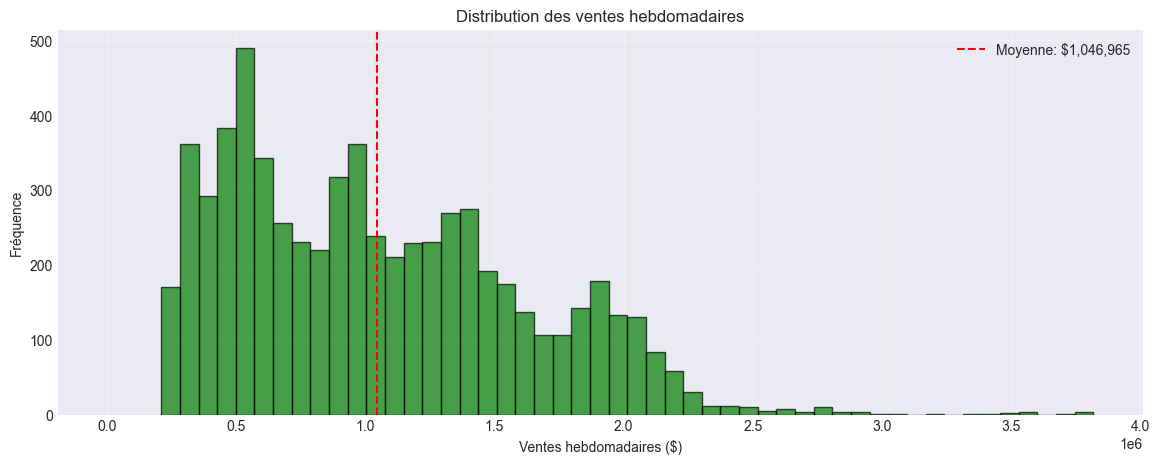

Statistiques des ventes:
Moyenne: $1,046,964.88
Médiane: $960,746.04
Min: $209,986.25
Max: $3,818,686.45


In [9]:
# Visualiser la distribution des ventes
plt.figure(figsize=(14, 5))

plt.plot(1, 2, 1)
plt.hist(df['Weekly_Sales'], bins=50, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Ventes hebdomadaires ($)')
plt.ylabel('Fréquence')
plt.title('Distribution des ventes hebdomadaires')
plt.axvline(df['Weekly_Sales'].mean(), color='red', linestyle='--', 
            label=f'Moyenne: ${df["Weekly_Sales"].mean():,.0f}')
plt.legend()
plt.grid(alpha=0.3)

plt.savefig('../visualizations/sales_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Statistiques des ventes:")
print(f"Moyenne: ${df['Weekly_Sales'].mean():,.2f}")
print(f"Médiane: ${df['Weekly_Sales'].median():,.2f}")
print(f"Min: ${df['Weekly_Sales'].min():,.2f}")
print(f"Max: ${df['Weekly_Sales'].max():,.2f}")

Comparaison Vacances vs Normal:
                             mean      median  count
Semaine normale      1.041256e+06   956211.20   5985
Semaine de vacances  1.122888e+06  1018538.04    450

Différence de ventes moyennes: $81,631.51
Augmentation en %: 7.84%


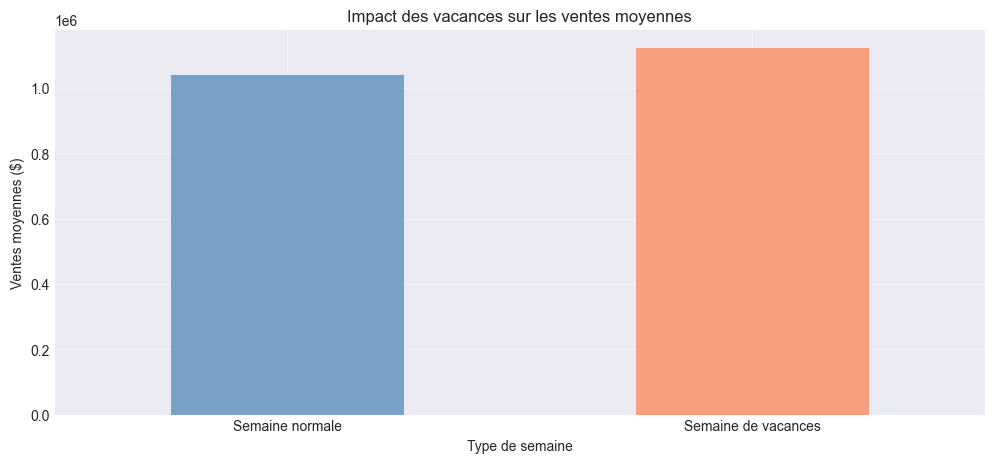

In [10]:
# Analyser l'impact des vacances sur les ventes
holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].agg(['mean', 'median', 'count'])
holiday_sales.index = ['Semaine normale', 'Semaine de vacances']

print("Comparaison Vacances vs Normal:")
print(holiday_sales)
print(f"\nDifférence de ventes moyennes: ${holiday_sales['mean'].iloc[1] - holiday_sales['mean'].iloc[0]:,.2f}")
print(f"Augmentation en %: {((holiday_sales['mean'].iloc[1] / holiday_sales['mean'].iloc[0]) - 1) * 100:.2f}%")

# Visualisation
plt.figure(figsize=(12, 5))

plt.plot(1, 2, 1)
holiday_sales['mean'].plot(kind='bar', color=['steelblue', 'coral'], alpha=0.7)
plt.xlabel('Type de semaine')
plt.ylabel('Ventes moyennes ($)')
plt.title('Impact des vacances sur les ventes moyennes')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)


plt.savefig('../visualizations/holiday_impact.png', dpi=300, bbox_inches='tight')
plt.show()

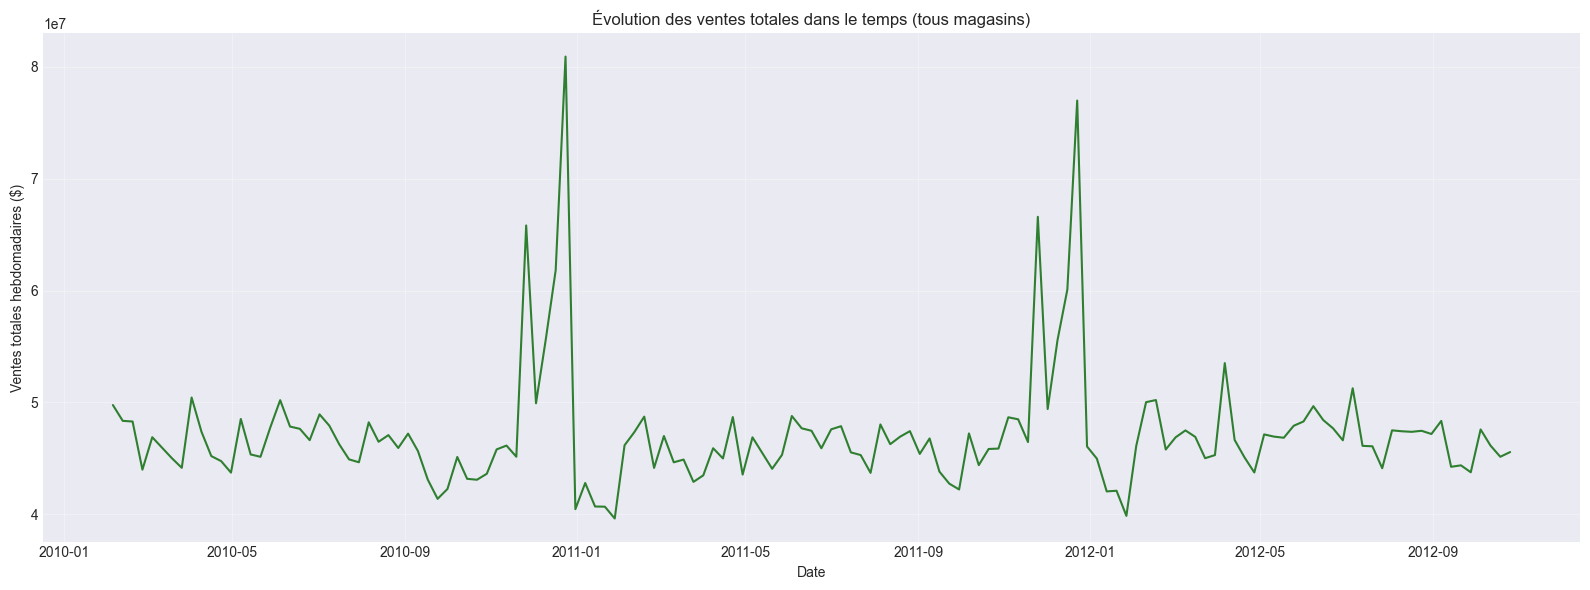


Ventes par année:
              mean           sum  count
Year                                   
2010  1.059670e+06  2.288886e+09   2160
2011  1.046239e+06  2.448200e+09   2340
2012  1.033660e+06  2.000133e+09   1935


In [12]:
# Évolution des ventes totales dans le temps
sales_by_date = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(16, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Weekly_Sales'], 
         linewidth=1.5, alpha=0.8, color='darkgreen')
plt.xlabel('Date')
plt.ylabel('Ventes totales hebdomadaires ($)')
plt.title('Évolution des ventes totales dans le temps (tous magasins)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/sales_trends.png', dpi=300, bbox_inches='tight')
plt.show()


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
sales_by_year = df.groupby('Year')['Weekly_Sales'].agg(['mean', 'sum', 'count'])
print("\nVentes par année:")
print(sales_by_year)

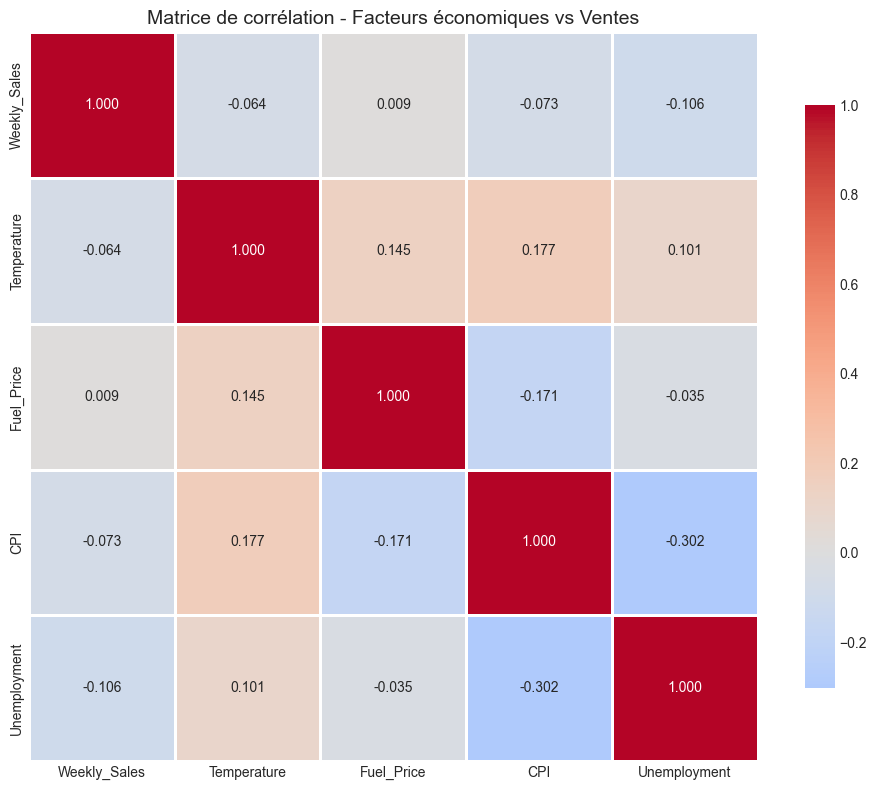


Corrélations avec Weekly_Sales:
Weekly_Sales    1.000000
Fuel_Price      0.009464
Temperature    -0.063810
CPI            -0.072634
Unemployment   -0.106176
Name: Weekly_Sales, dtype: float64


In [14]:
# Analyser les corrélations entre variables
numeric_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
correlation = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de corrélation - Facteurs économiques vs Ventes', fontsize=14)
plt.tight_layout()
plt.savefig('../visualizations/correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCorrélations avec Weekly_Sales:")
print(correlation['Weekly_Sales'].sort_values(ascending=False))

Classement des magasins par ventes moyennes:
               mean           sum  count
Store                                   
20     2.107677e+06  3.013978e+08    143
4      2.094713e+06  2.995440e+08    143
14     2.020978e+06  2.889999e+08    143
13     2.003620e+06  2.865177e+08    143
2      1.925751e+06  2.753824e+08    143


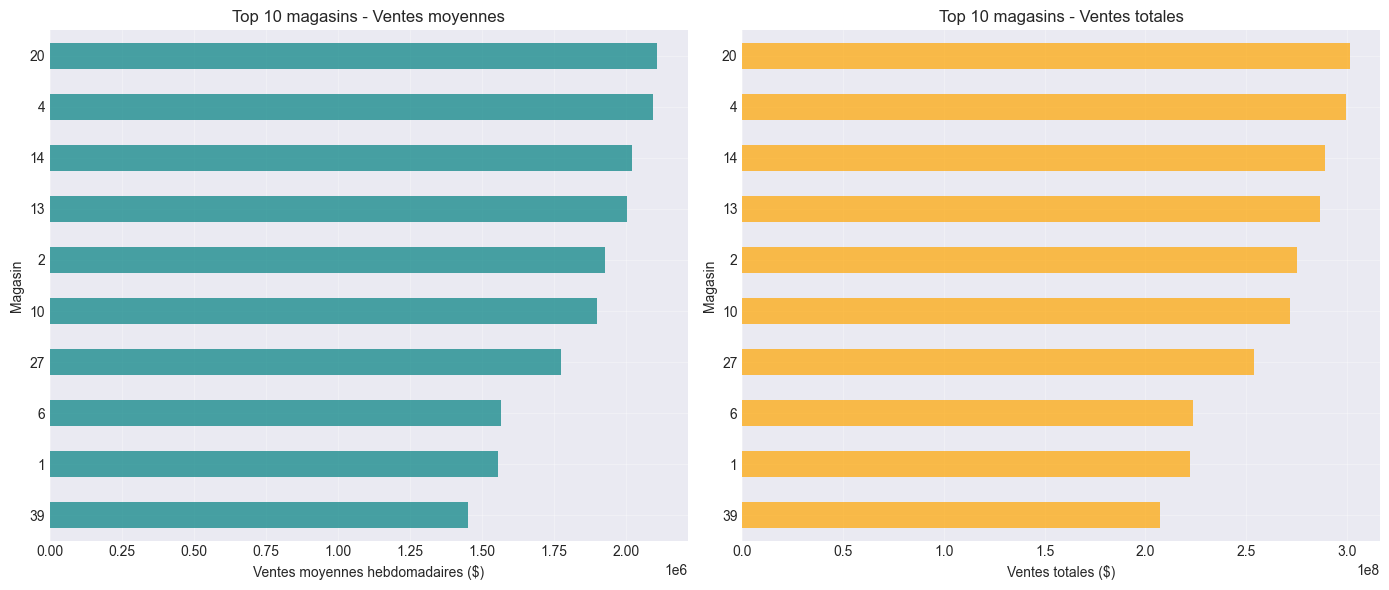

In [16]:
top_stores = df.groupby('Store')['Weekly_Sales'].agg(['mean', 'sum', 'count']).sort_values('mean', ascending=False)

print("Classement des magasins par ventes moyennes:")
print(top_stores.head())

# Visualisation
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
top_stores.head(10)['mean'].plot(kind='barh', color='teal', alpha=0.7)
plt.xlabel('Ventes moyennes hebdomadaires ($)')
plt.ylabel('Magasin')
plt.title('Top 10 magasins - Ventes moyennes')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
top_stores.head(10)['sum'].plot(kind='barh', color='orange', alpha=0.7)
plt.xlabel('Ventes totales ($)')
plt.ylabel('Magasin')
plt.title('Top 10 magasins - Ventes totales')
plt.gca().invert_yaxis()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../visualizations/store_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [18]:
# Sauvegarder les données enrichies
df.to_csv('../data/processed/walmart_enriched.csv', index=False)
print("Données enrichies sauvegardées!")

# Résumé final de l'exploration
summary = f"""
RÉSUMÉ DE L'ANALYSE COMPLÈTE
================================

DONNÉES GÉNÉRALES:
- {len(df):,} enregistrements de ventes
- {df['Store'].nunique()} magasins Walmart
- Période: {df['Date'].min().strftime('%d/%m/%Y')} à {df['Date'].max().strftime('%d/%m/%Y')}
- {df['Year'].nunique()} années de données

VENTES:
- Ventes moyennes: ${df['Weekly_Sales'].mean():,.2f}
- Ventes totales: ${df['Weekly_Sales'].sum():,.2f}
- Range: ${df['Weekly_Sales'].min():,.2f} - ${df['Weekly_Sales'].max():,.2f}

IMPACT VACANCES:
- Semaines normales: ${holiday_sales['mean'].iloc[0]:,.2f}
- Semaines de vacances: ${holiday_sales['mean'].iloc[1]:,.2f}
- Augmentation: {((holiday_sales['mean'].iloc[1] / holiday_sales['mean'].iloc[0]) - 1) * 100:.2f}%

TOP 3 MAGASINS:
1. Magasin {top_stores.index[0]}: ${top_stores['mean'].iloc[0]:,.2f}/semaine
2. Magasin {top_stores.index[1]}: ${top_stores['mean'].iloc[1]:,.2f}/semaine
3. Magasin {top_stores.index[2]}: ${top_stores['mean'].iloc[2]:,.2f}/semaine

CORRÉLATIONS CLÉS:
- Temperature: {correlation['Weekly_Sales']['Temperature']:.3f}
- Fuel_Price: {correlation['Weekly_Sales']['Fuel_Price']:.3f}
- CPI: {correlation['Weekly_Sales']['CPI']:.3f}
- Unemployment: {correlation['Weekly_Sales']['Unemployment']:.3f}

"""

print(summary)

Données enrichies sauvegardées!

RÉSUMÉ DE L'ANALYSE COMPLÈTE

DONNÉES GÉNÉRALES:
- 6,435 enregistrements de ventes
- 45 magasins Walmart
- Période: 05/02/2010 à 26/10/2012
- 3 années de données

VENTES:
- Ventes moyennes: $1,046,964.88
- Ventes totales: $6,737,218,987.11
- Range: $209,986.25 - $3,818,686.45

IMPACT VACANCES:
- Semaines normales: $1,041,256.38
- Semaines de vacances: $1,122,887.89
- Augmentation: 7.84%

TOP 3 MAGASINS:
1. Magasin 20: $2,107,676.87/semaine
2. Magasin 4: $2,094,712.96/semaine
3. Magasin 14: $2,020,978.40/semaine

CORRÉLATIONS CLÉS:
- Temperature: -0.064
- Fuel_Price: 0.009
- CPI: -0.073
- Unemployment: -0.106


